# Лабораторная работа №4

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from math import sqrt
sns.set(color_codes=True)

## Постановка задачи
Для 5 распределений:
* Нормальное распределение $N(x,0,1)$;
* Распределение Коши $C(x,0,1)$;
* Распределение Лапласа $L(x,0,1 / \sqrt{2})$;
* Распределение Пуассона $P(k,10)$;
* Равномерное распределение $U(x,-\sqrt{3},\sqrt{3})$

 Сгенерировать выборки размером 20, 60 и 100 элементов. Построить на них эмпирические функции распределения и ядерные оценки плотности распределения на отрезке $[-4;4]$ для непрерывных распределений и на отрезке $[6;14]$ для распределения Пуассона.
 
## Реализация

In [2]:
# Normal distribution
normal_distribution = {
    'distrib' : np.random.standard_normal,
    'pdf' : stats.norm.pdf,
    'cdf' : stats.norm.cdf,
    'ppf' : stats.norm.ppf,
    'title' : "Normal distribution $N(x,0,1)$",
    'name' : "Normal distribution",
}

# Cauchy distribution
cauchy_distribution = {
    'distrib' : np.random.standard_cauchy,
    'pdf' : stats.cauchy.pdf,
    'cdf' : stats.cauchy.cdf,
    'ppf' : stats.cauchy.ppf,
    'title' : "Cauchy distribution $C(x,0,1)$",
    'name' : "Cauchy distribution",
}

# Laplace distribution
laplace_param = [0, 1 / sqrt(2)] # mu, lambda
laplace_distribution = {
    'distrib' : lambda n: np.random.laplace(laplace_param[0], laplace_param[1], n),
    'pdf' : lambda x: stats.laplace.pdf(x, laplace_param[0], laplace_param[1]),
    'cdf' : lambda x: stats.laplace.cdf(x, laplace_param[0], laplace_param[1]),
    'ppf' : lambda q: stats.laplace.ppf(q, laplace_param[0], laplace_param[1]),
    'title' : "Laplace distribution $L(x,0,1 / \sqrt{2})$",
    'name' : "Laplace distribution",
}

# Poisson distribution
poisson_param = 10 # mu
poisson_distribution = {
    'distrib' : lambda n: np.random.poisson(poisson_param, n),
    'pdf' : lambda x: (np.power(x, poisson_param) / np.math.factorial(poisson_param)) * np.exp(-x),
    'pmf' : lambda k: stats.poisson.pmf(k, poisson_param),
    'cdf' : lambda k: stats.poisson.cdf(k, poisson_param),
    'ppf' : lambda q: stats.poisson.ppf(q, poisson_param),
    'title' : "Poisson distribution $P(k,10)$",
    'name' : "Poisson distribution",
}

# Uniform distribution
segment = [-sqrt(3), sqrt(3)]
uniform_distribution = {
    'distrib' : lambda n: np.random.uniform(segment[0], segment[1], n),
    'pdf' : lambda x: stats.uniform.pdf(x, segment[0], segment[1] - segment[0]),
    'cdf' : lambda x: stats.uniform.cdf(x, segment[0], segment[1] - segment[0]),
    'ppf' : lambda q: stats.uniform.ppf(q, segment[0], segment[1] - segment[0]),
    'title' : "Uniform distribution $U(x,-\sqrt{3},\sqrt{3})$",
    'name' : "Uniform distribution",
}

In [12]:
def build_statistical_series(sample):
    sort_sample = np.sort(sample)
    z = []
    n = []
    
    i = 0
    for elem in sort_sample:
        if i == 0 or z[i - 1] != elem:
            z.append(elem)
            n.append(1)
            i += 1
        else:
            n[i - 1] += 1
    return [np.array(z), np.array(n)]

def edf(x, sample):
    ### Empirical distribution function ###
    
    statistical_series = build_statistical_series(sample)
    probability = []
    for elem in x:
        indexes = statistical_series[0] < elem
        n = np.sum(statistical_series[1][indexes])
        probability.append(n)
    return np.array(probability) / len(sample)

def K(u):
    ### Kernel function ###
    return stats.norm.pdf(u)
    
def kernel_pdf(x, sample, h):
    res = []
    for elem in x:
        u = (elem - sample) / h
        res.append(np.sum(K(u)))
    return np.array(res) / (len(sample) * h)
    

def ResearchDistibution(distribution, n, rounded=4):
    np.random.seed(42)
    print(distrib['name'])
    
    h = np.power(n, -0.2) * 1.06
    h *= [0.5, 1, 2]
    h_str = ['$h_n/2$', '$h_n$', '$2h_n$']
    
    if distribution is not poisson_distribution:
        interval = (-4, 4)
    else:
        interval = (6, 14)
    x = np.linspace(interval[0], interval[1])
    
    fig1, axes1 = plt.subplots(1, 3, figsize=(20, 6), squeeze=False)
    # fig.suptitle(distribution['name'], fontsize=25)
    
    fig2, axes2 = plt.subplots(3, 3, figsize=(20, 18), squeeze=False)
    
    for i in range(len(n)):
        sample = distribution['distrib'](n[i])
        sample.sort()

        ax = axes1[np.unravel_index(i, shape=axes1.shape)]
        ax.set_title("n = " + str(n[i]), fontsize=16, fontweight="bold")        
        ax.plot(x, edf(x, sample), linewidth=3)
        ax.plot(x, distribution['cdf'](x), linewidth=3)
        ax.set_ylabel("P(x)")
        ax.set_xlabel("x")
        ax.legend(["$F^*_n(x)$", "$F_X(x)$"])
        
        for j in range(len(h)):
            ax = axes2[np.unravel_index(i * len(h) + j, shape=axes2.shape)]
            ax.set_title("n = " + str(n[i]) + ", h = " + h_str[j], fontsize=16)        
            ax.plot(x, kernel_pdf(x, sample, h[j]), linewidth=3)
            ax.plot(x, distribution['pdf'](x), linewidth=3)
            ax.set_ylabel("f(x)")
            ax.set_xlabel("x")
            ax.legend(["$\hat{f}(x)$", "$f(x)$"])
    fig1.savefig("pictures/" + distribution['name'] + " (edf)")
    fig2.savefig("pictures/" + distribution['name'] + " (kernel)")
    plt.show()

In [13]:
distributions = [normal_distribution,
                 cauchy_distribution,
                 laplace_distribution,
                 poisson_distribution,
                 uniform_distribution]

Normal distribution


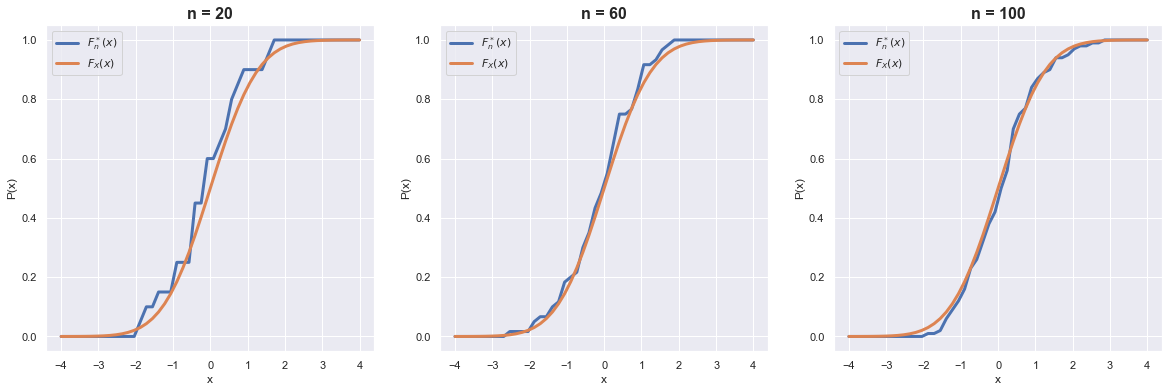

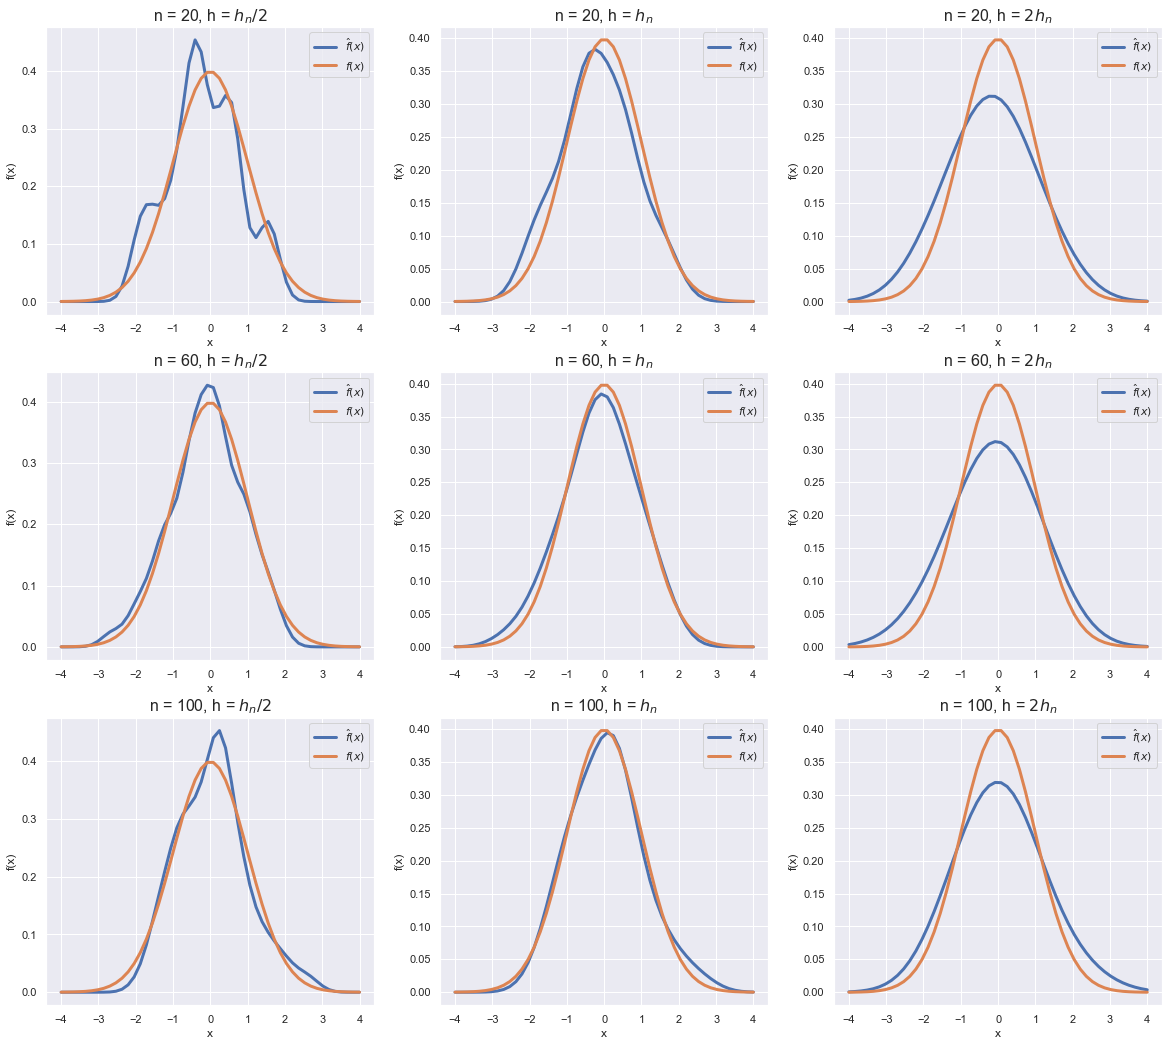

Cauchy distribution


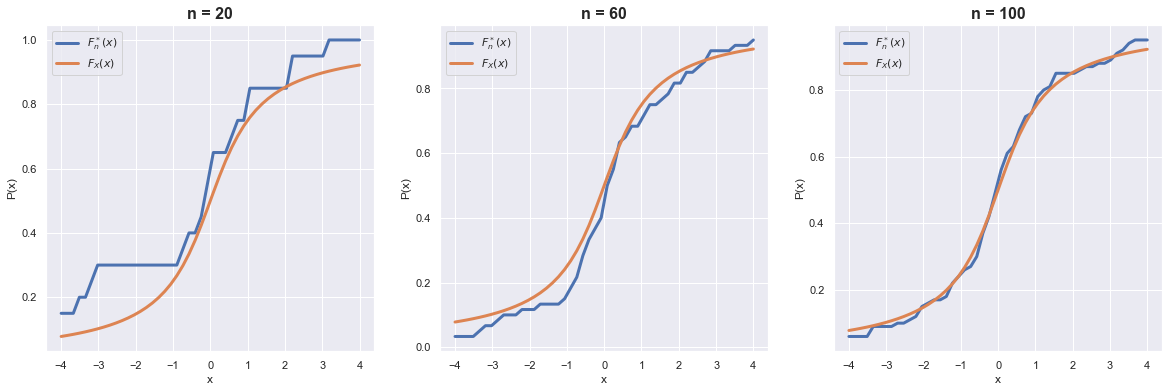

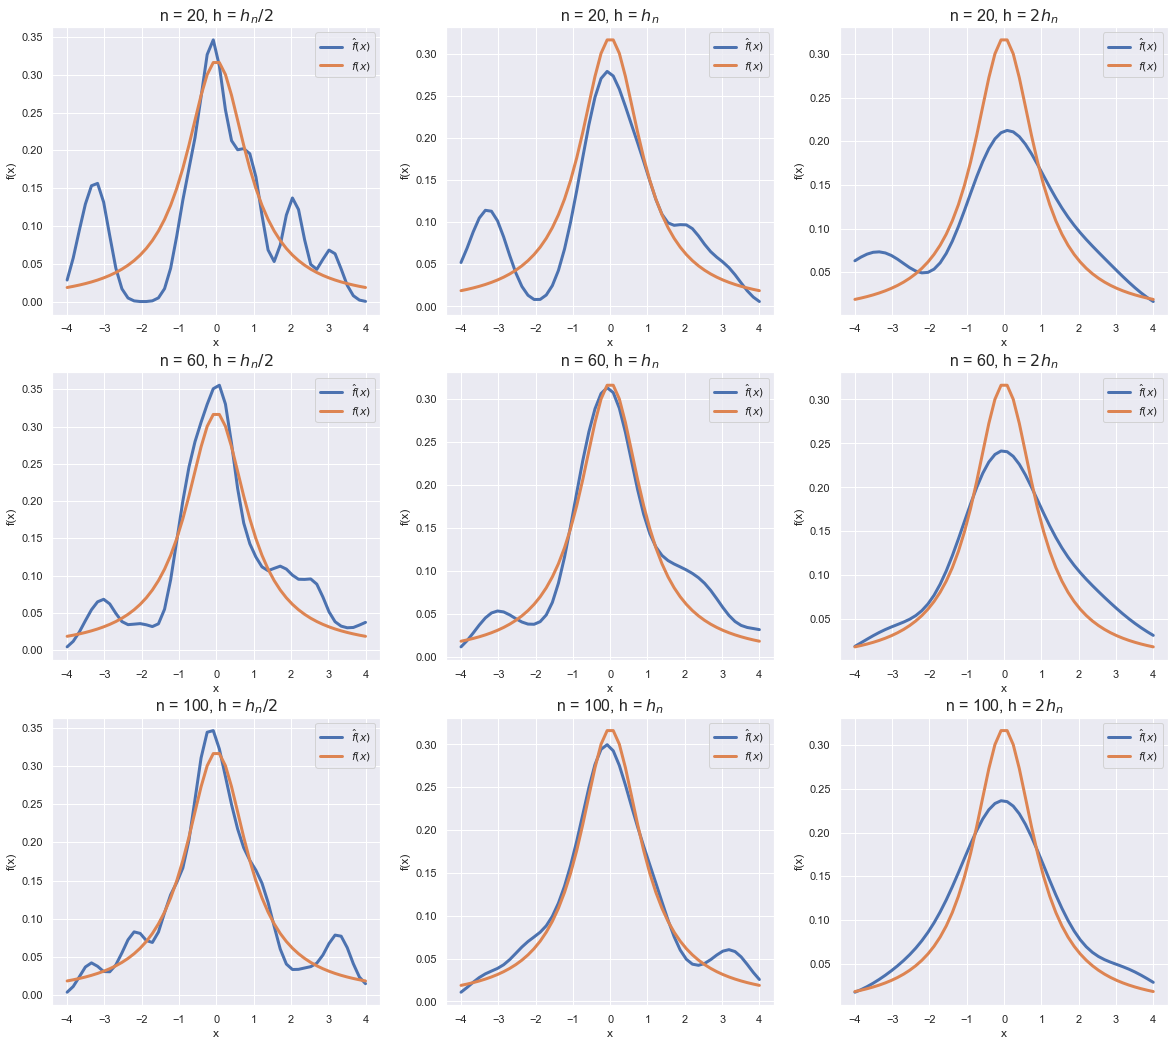

Laplace distribution


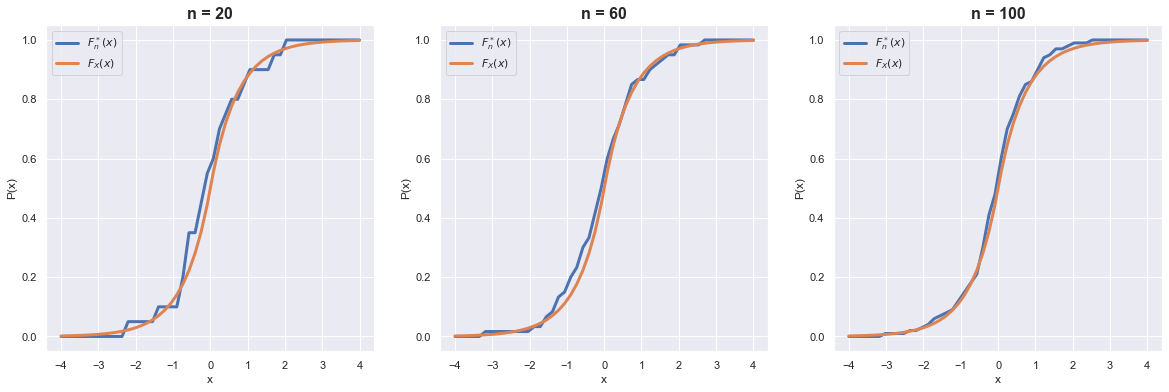

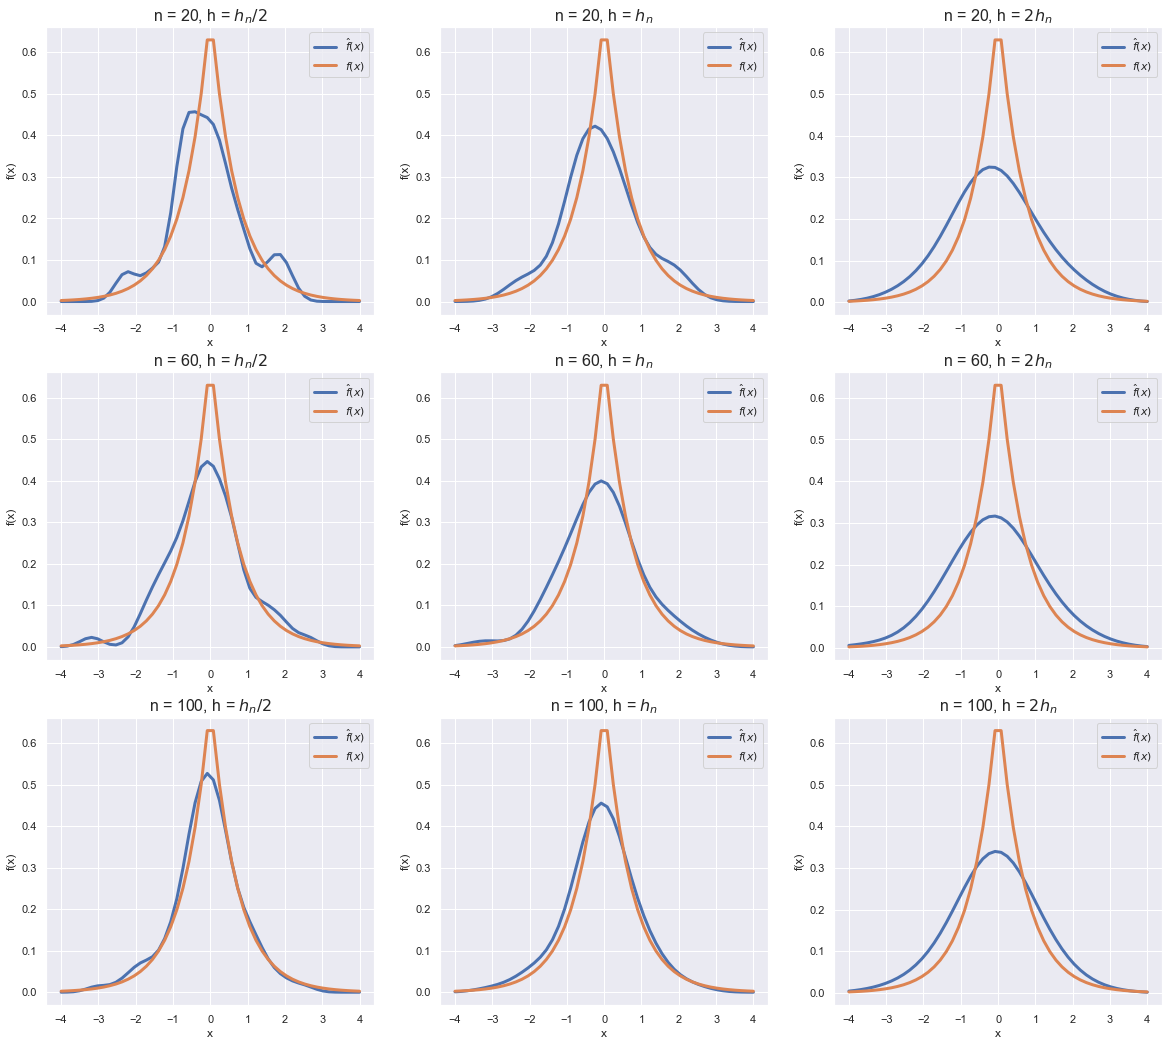

Poisson distribution


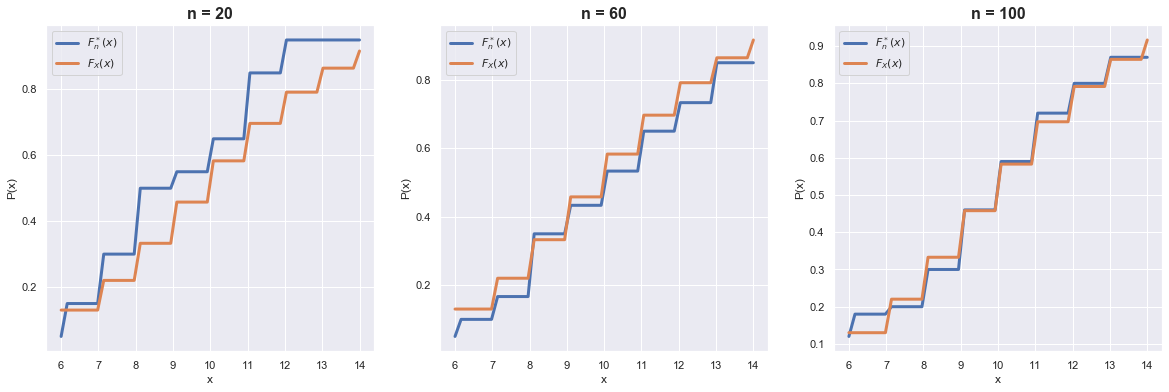

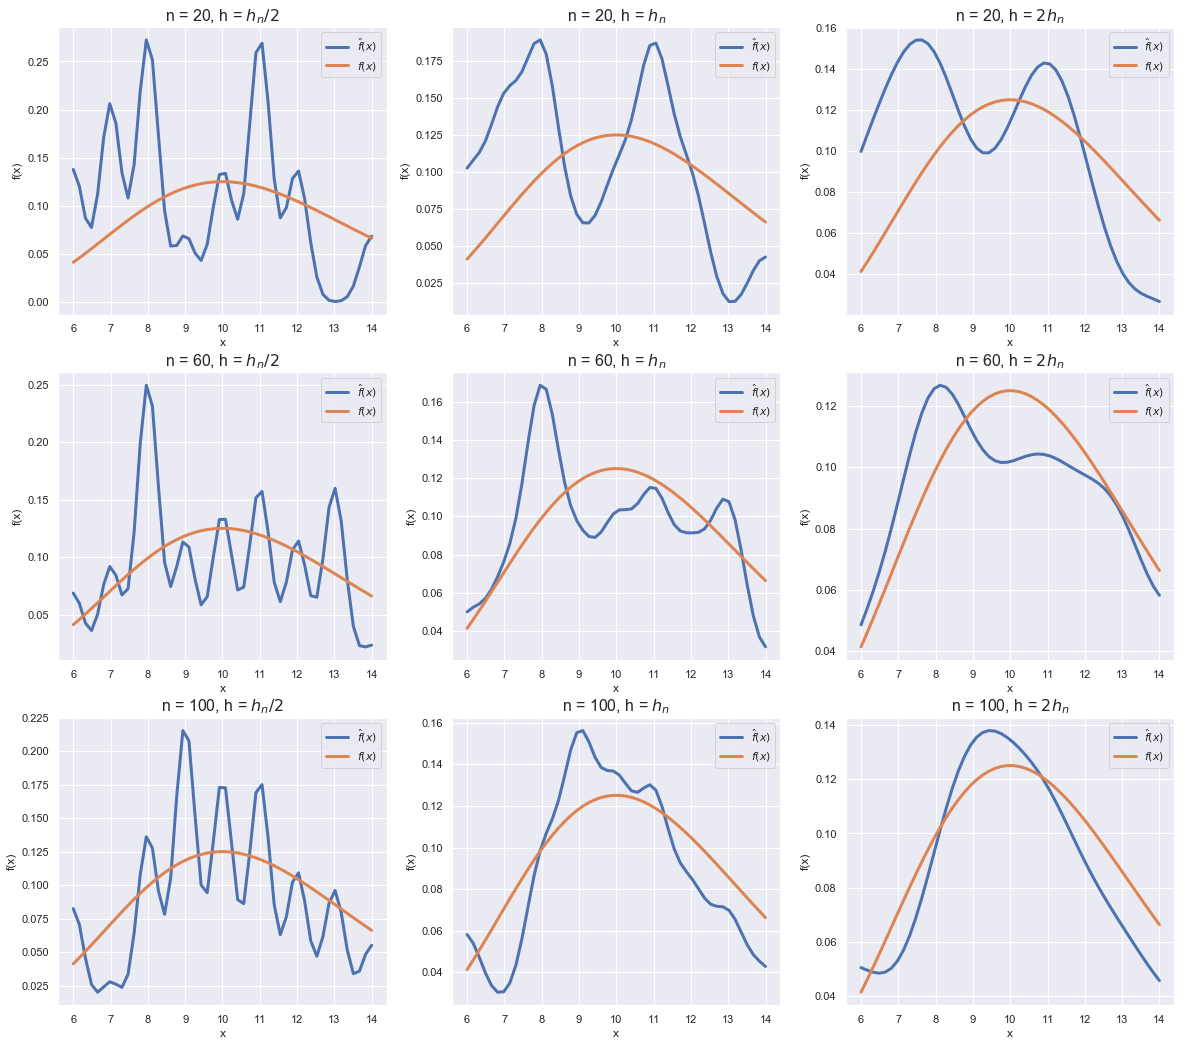

Uniform distribution


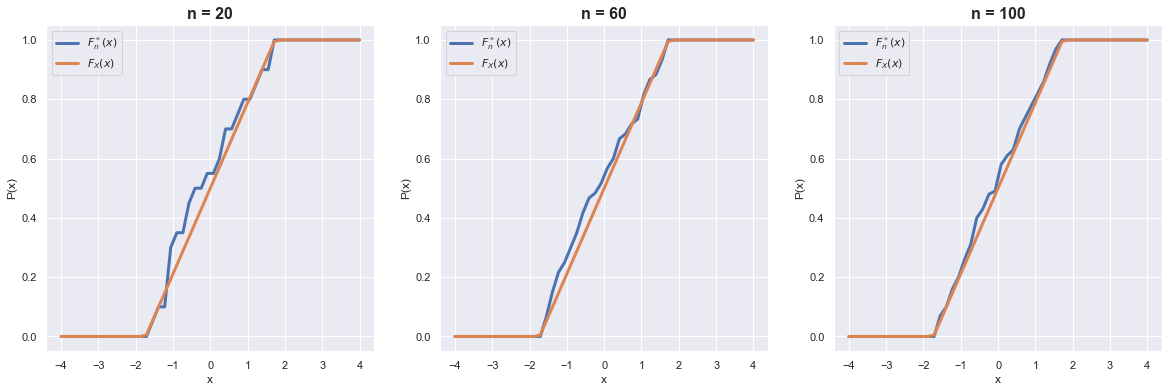

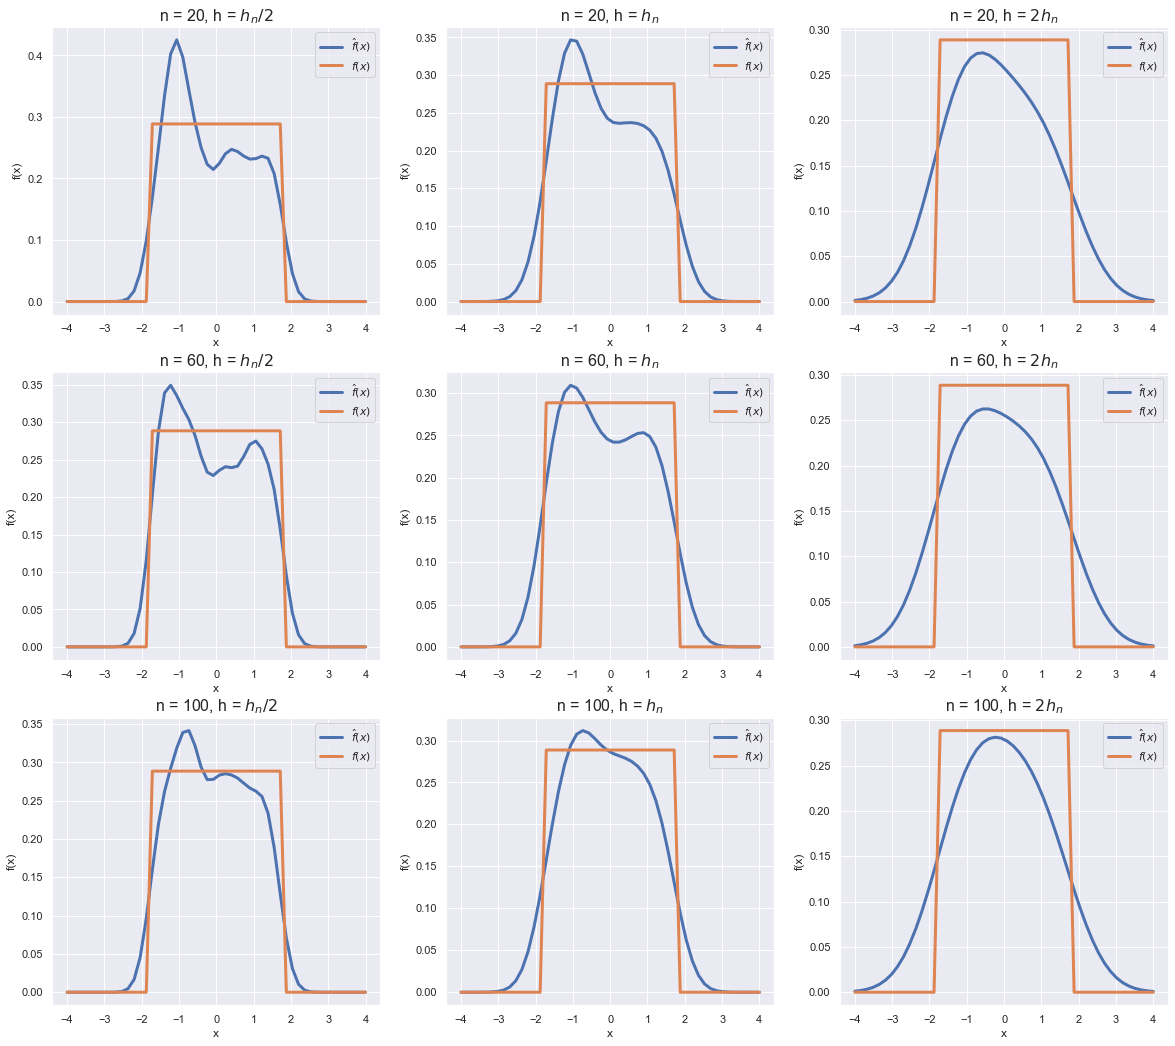

In [14]:
n = [20, 60, 100]

for distrib in distributions:
    ResearchDistibution(distrib, n)